In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Here above we import all libraries and now we will read the data on which we have to perform

In [73]:
data=pd.read_excel('HEROdata2.xlsx')

In [74]:
data

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label,Circuit
0,26623,198177,172368,164960,6850,0,19504,22,173046.832023,10376.128102,...,18253.0,32696.0000,5135800.0,56082.0000,45560.0,38947.0000,5677500.0,90182.0000,'Trojan Free','AES'
1,27289,198776,172486,164991,6934,0,19504,2,173081.678022,10376.128102,...,18260.0,32707.0000,5136600.0,56101.0000,45820.0,38963.0000,5685000.0,90465.0000,'Trojan Infected','AES-T100'
2,27545,198893,172468,164973,6934,0,19504,2,173066.250022,10376.128102,...,18257.0,32707.0000,5136200.0,56097.0000,45851.0,38965.0000,5685000.0,90498.0000,'Trojan Infected','AES-T200'
3,28033,198562,172369,164960,6850,0,19504,1,173046.832023,10376.128102,...,18250.0,32693.0000,5135800.0,56076.0000,45553.0,38942.0000,5677500.0,90170.0000,'Trojan Infected','AES-T300'
4,27325,199431,172899,165330,7007,0,19518,3,173451.418025,10385.704102,...,18286.0,32727.0000,5144100.0,56154.0000,45725.0,38982.0000,5701100.0,90405.0000,'Trojan Infected','AES-T400'
5,27009,198562,172369,164960,6850,0,19504,1,173046.832023,10376.128102,...,18250.0,32693.0000,5135800.0,56076.0000,45553.0,38942.0000,5677500.0,90170.0000,'Trojan Infected','AES-T500'
6,27140,198742,172419,165007,6852,0,19505,2,173107.214024,10376.660102,...,18254.0,32699.0000,5136900.0,56086.0000,45564.0,38949.0000,5678800.0,90189.0000,'Trojan Infected','AES-T600'
7,27421,198972,172545,165048,6935,0,19507,3,173162.010024,10377.724102,...,18253.0,32699.0000,5138300.0,56088.0000,45795.0,38950.0000,5686700.0,90428.0000,'Trojan Infected','AES-T700'
8,27421,199066,172639,165139,6938,0,19524,3,173272.400023,10386.768102,...,18259.0,32704.0000,5140600.0,56101.0000,45804.0,38955.0000,5689100.0,90445.0000,'Trojan Infected','AES-T800'
9,27677,199607,172927,165430,6934,0,19634,3,173666.346033,10445.288103,...,18259.0,32708.0000,5148600.0,56115.0000,45804.0,38959.0000,5696900.0,90458.0000,'Trojan Infected','AES-T900'


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 51 columns):
Number of ports                  907 non-null int64
Number of nets                   907 non-null int64
Number of cells                  907 non-null int64
Number of combinational cells    907 non-null int64
Number of sequential cells       907 non-null int64
Number of macros/black boxes     907 non-null int64
Number of buf/inv                907 non-null int64
Number of references             907 non-null int64
Combinational area               907 non-null float64
Buf/Inv area                     907 non-null float64
Noncombinational area            907 non-null float64
Macro/Black Box area             907 non-null int64
Total cell area                  907 non-null float64
Cell Internal Power (mW)         907 non-null float64
Net Switching Power (mW)         907 non-null float64
Total Dynamic Power (mW)         907 non-null float64
Cell Leakage Power (mW)          907 non-null flo

In [76]:
print(len(data))

907


In [77]:
data.isnull().sum()

Number of ports                  0
Number of nets                   0
Number of cells                  0
Number of combinational cells    0
Number of sequential cells       0
Number of macros/black boxes     0
Number of buf/inv                0
Number of references             0
Combinational area               0
Buf/Inv area                     0
Noncombinational area            0
Macro/Black Box area             0
Total cell area                  0
Cell Internal Power (mW)         0
Net Switching Power (mW)         0
Total Dynamic Power (mW)         0
Cell Leakage Power (mW)          0
IO_Pad Internal Power            0
IO_Pad Switching Power           0
IO_Pad Leakage Power             0
IO_Pad Total Power               0
Memory Internal Power            0
Memory Switching Power           0
Memory Leakage Power             0
Memory Total Power               0
Black_Box Internal Power         0
Black_Box Switching Power        0
Black_Box Leakage Power          0
Black_Box Total Powe

In [78]:
data['Label']=data['Label'].apply(lambda x: x.strip("'"))

In [79]:
data['Label'].value_counts()

Trojan Infected    886
Trojan Free         21
Name: Label, dtype: int64

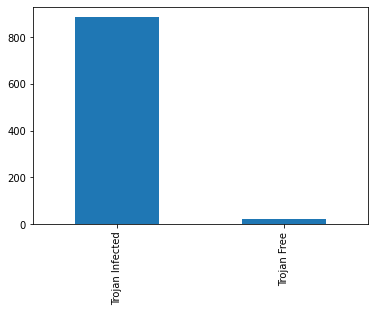

In [80]:
data['Label'].value_counts().plot(kind='bar')

In [81]:
corr_matrix=data.corr()
corr_matrix

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Sequential Leakage Power,Sequential Total Power,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power
Number of ports,1.000000,0.923447,0.899204,0.939950,0.077091,NaN,0.941895,-0.167156,0.941086,0.943091,...,0.293365,0.266848,0.931580,0.922369,0.937321,0.928713,0.936091,0.924226,0.937664,0.932590
Number of nets,0.923447,1.000000,0.998195,0.962824,0.335345,NaN,0.963025,-0.128245,0.962957,0.963153,...,0.289268,0.255055,0.961543,0.987485,0.962469,0.978851,0.962038,0.984338,0.962479,0.973273
Number of cells,0.899204,0.998195,1.000000,0.953827,0.369228,NaN,0.953762,-0.126065,0.953799,0.953719,...,0.285528,0.251522,0.953677,0.984377,0.953836,0.973680,0.953575,0.980553,0.953803,0.966804
Number of combinational cells,0.939950,0.962824,0.953827,1.000000,0.073048,NaN,0.999967,-0.197269,0.999994,0.999939,...,0.302595,0.267445,0.999703,0.990799,0.999970,0.996659,0.999789,0.993328,0.999969,0.998639
Number of sequential cells,0.077091,0.335345,0.369228,0.073048,1.000000,NaN,0.072928,0.191725,0.072971,0.072869,...,0.011778,0.007684,0.073496,0.202989,0.073178,0.149337,0.072875,0.182470,0.073072,0.120371
Number of macros/black boxes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of buf/inv,0.941895,0.963025,0.953762,0.999967,0.072928,NaN,1.000000,-0.197272,0.999980,0.999993,...,0.305057,0.269119,0.999514,0.990559,0.999891,0.996449,0.999771,0.993085,0.999916,0.998522
Number of references,-0.167156,-0.128245,-0.126065,-0.197269,0.191725,NaN,-0.197272,1.000000,-0.197098,-0.197160,...,-0.051225,-0.035506,-0.198033,-0.165640,-0.197515,-0.179469,-0.197603,-0.171112,-0.197476,-0.186468
Combinational area,0.941086,0.962957,0.953799,0.999994,0.072971,NaN,0.999980,-0.197098,1.000000,0.999964,...,0.303074,0.267994,0.999611,0.990677,0.999937,0.996554,0.999755,0.993204,0.999942,0.998566
Buf/Inv area,0.943091,0.963153,0.953719,0.999939,0.072869,NaN,0.999993,-0.197160,0.999964,1.000000,...,0.305269,0.269317,0.999399,0.990414,0.999835,0.996322,0.999706,0.992938,0.999864,0.998421


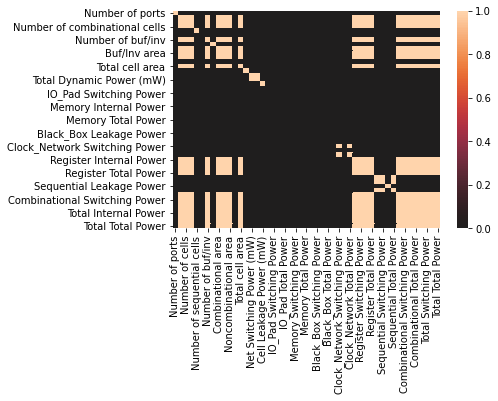

In [82]:
sns.heatmap(data.corr()>0.95,center=0)

In [83]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))


In [84]:
upper

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Sequential Leakage Power,Sequential Total Power,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power
Number of ports,NaN,0.923447,0.899204,0.939950,0.077091,NaN,0.941895,-0.167156,0.941086,0.943091,...,0.293365,0.266848,0.931580,0.922369,0.937321,0.928713,0.936091,0.924226,0.937664,0.932590
Number of nets,NaN,NaN,0.998195,0.962824,0.335345,NaN,0.963025,-0.128245,0.962957,0.963153,...,0.289268,0.255055,0.961543,0.987485,0.962469,0.978851,0.962038,0.984338,0.962479,0.973273
Number of cells,NaN,NaN,NaN,0.953827,0.369228,NaN,0.953762,-0.126065,0.953799,0.953719,...,0.285528,0.251522,0.953677,0.984377,0.953836,0.973680,0.953575,0.980553,0.953803,0.966804
Number of combinational cells,NaN,NaN,NaN,NaN,0.073048,NaN,0.999967,-0.197269,0.999994,0.999939,...,0.302595,0.267445,0.999703,0.990799,0.999970,0.996659,0.999789,0.993328,0.999969,0.998639
Number of sequential cells,NaN,NaN,NaN,NaN,NaN,NaN,0.072928,0.191725,0.072971,0.072869,...,0.011778,0.007684,0.073496,0.202989,0.073178,0.149337,0.072875,0.182470,0.073072,0.120371
Number of macros/black boxes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of buf/inv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.197272,0.999980,0.999993,...,0.305057,0.269119,0.999514,0.990559,0.999891,0.996449,0.999771,0.993085,0.999916,0.998522
Number of references,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.197098,-0.197160,...,-0.051225,-0.035506,-0.198033,-0.165640,-0.197515,-0.179469,-0.197603,-0.171112,-0.197476,-0.186468
Combinational area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999964,...,0.303074,0.267994,0.999611,0.990677,0.999937,0.996554,0.999755,0.993204,0.999942,0.998566
Buf/Inv area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.305269,0.269317,0.999399,0.990414,0.999835,0.996322,0.999706,0.992938,0.999864,0.998421


In [85]:
upper.columns

Index(['Number of ports', 'Number of nets', 'Number of cells',
       'Number of combinational cells', 'Number of sequential cells',
       'Number of macros/black boxes', 'Number of buf/inv',
       'Number of references', 'Combinational area', 'Buf/Inv area',
       'Noncombinational area', 'Macro/Black Box area', 'Total cell area',
       'Cell Internal Power (mW)', 'Net Switching Power (mW)',
       'Total Dynamic Power (mW)', 'Cell Leakage Power (mW)',
       'IO_Pad Internal Power', 'IO_Pad Switching Power',
       'IO_Pad Leakage Power', 'IO_Pad Total Power', 'Memory Internal Power',
       'Memory Switching Power', 'Memory Leakage Power', 'Memory Total Power',
       'Black_Box Internal Power', 'Black_Box Switching Power',
       'Black_Box Leakage Power', 'Black_Box Total Power',
       'Clock_Network Internal Power', 'Clock_Network Switching Power',
       'Clock_Network Leakage Power', 'Clock_Network Total Power',
       'Register Internal Power', 'Register Switching Power',

In [86]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [87]:
to_drop

['Number of cells',
 'Number of combinational cells',
 'Number of buf/inv',
 'Combinational area',
 'Buf/Inv area',
 'Noncombinational area',
 'Total cell area',
 'Total Dynamic Power (mW)',
 'Clock_Network Total Power',
 'Register Internal Power',
 'Register Switching Power',
 'Register Leakage Power',
 'Register Total Power',
 'Sequential Switching Power',
 'Sequential Total Power',
 'Combinational Internal Power',
 'Combinational Switching Power',
 'Combinational Leakage Power',
 'Combinational Total Power',
 'Total Internal Power',
 'Total Switching Power',
 'Total Leakage Power',
 'Total Total Power']

In [88]:
data=data.drop(data[to_drop],axis=1)

In [89]:
data

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label,Circuit
0,26623,198177,6850,0,22,0,45.5597,38.9455,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Free,'AES'
1,27289,198776,6934,0,2,0,45.8198,38.9611,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T100'
2,27545,198893,6934,0,2,0,45.8511,38.9633,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T200'
3,28033,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T300'
4,27325,199431,7007,0,3,0,45.7246,38.9802,5.7011,0,...,0,0,0,0,0.0,0,39.8946,13018.0000,Trojan Infected,'AES-T400'
5,27009,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T500'
6,27140,198742,6852,0,2,0,45.5643,38.9469,5.6788,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T600'
7,27421,198972,6935,0,3,0,45.7951,38.9481,5.6867,0,...,0,0,0,0,0.0,0,0.1327,38.7900,Trojan Infected,'AES-T700'
8,27421,199066,6938,0,3,0,45.8041,38.9531,5.6891,0,...,0,0,0,0,0.0,0,0.5295,155.1727,Trojan Infected,'AES-T800'
9,27677,199607,6934,0,3,0,45.8041,38.9578,5.6969,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T900'


In [90]:
data.isnull().sum()

Number of ports                  0
Number of nets                   0
Number of sequential cells       0
Number of macros/black boxes     0
Number of references             0
Macro/Black Box area             0
Cell Internal Power (mW)         0
Net Switching Power (mW)         0
Cell Leakage Power (mW)          0
IO_Pad Internal Power            0
IO_Pad Switching Power           0
IO_Pad Leakage Power             0
IO_Pad Total Power               0
Memory Internal Power            0
Memory Switching Power           0
Memory Leakage Power             0
Memory Total Power               0
Black_Box Internal Power         0
Black_Box Switching Power        0
Black_Box Leakage Power          0
Black_Box Total Power            0
Clock_Network Internal Power     0
Clock_Network Switching Power    0
Clock_Network Leakage Power      0
Sequential Internal Power        1
Sequential Leakage Power         0
Label                            0
Circuit                          0
dtype: int64

In [91]:
data.describe(include='all')

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label,Circuit
count,907.000000,907.000000,907.000000,907.0,907.000000,907.0,907.000000,907.000000,907.000000,907.0,...,907.0,907.0,907.0,907.0,907.000000,907.0,906.000000,907.000000,907,907
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,901
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trojan Infected,'S15850'
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886,3
mean,966.679162,8192.495039,3051.185226,0.0,22.961411,0.0,2.124552,152.059078,2.110147,0.0,...,0.0,0.0,0.0,0.0,0.151557,0.0,0.227307,82.113438,NaN,NaN
std,4516.012271,31340.525071,8246.304303,0.0,15.765026,0.0,12.608669,184.251812,27.665603,0.0,...,0.0,0.0,0.0,0.0,1.607494,0.0,2.696602,909.834812,NaN,NaN
min,26.000000,134.000000,39.000000,0.0,1.000000,0.0,0.000000,1.703400,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
25%,72.000000,1190.000000,1139.000000,0.0,7.000000,0.0,0.000000,38.945850,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
50%,218.000000,2491.000000,2312.000000,0.0,18.000000,0.0,0.000000,99.801400,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
75%,301.000000,2841.500000,2426.000000,0.0,37.000000,0.0,0.000000,174.024550,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN


In [92]:
data['Sequential Internal Power'].fillna(data['Sequential Internal Power'].mean(), inplace=True)

In [93]:
data

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label,Circuit
0,26623,198177,6850,0,22,0,45.5597,38.9455,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Free,'AES'
1,27289,198776,6934,0,2,0,45.8198,38.9611,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T100'
2,27545,198893,6934,0,2,0,45.8511,38.9633,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T200'
3,28033,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T300'
4,27325,199431,7007,0,3,0,45.7246,38.9802,5.7011,0,...,0,0,0,0,0.0,0,39.8946,13018.0000,Trojan Infected,'AES-T400'
5,27009,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T500'
6,27140,198742,6852,0,2,0,45.5643,38.9469,5.6788,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T600'
7,27421,198972,6935,0,3,0,45.7951,38.9481,5.6867,0,...,0,0,0,0,0.0,0,0.1327,38.7900,Trojan Infected,'AES-T700'
8,27421,199066,6938,0,3,0,45.8041,38.9531,5.6891,0,...,0,0,0,0,0.0,0,0.5295,155.1727,Trojan Infected,'AES-T800'
9,27677,199607,6934,0,3,0,45.8041,38.9578,5.6969,0,...,0,0,0,0,0.0,0,0.0000,0.0000,Trojan Infected,'AES-T900'


In [94]:
data.isnull().sum()

Number of ports                  0
Number of nets                   0
Number of sequential cells       0
Number of macros/black boxes     0
Number of references             0
Macro/Black Box area             0
Cell Internal Power (mW)         0
Net Switching Power (mW)         0
Cell Leakage Power (mW)          0
IO_Pad Internal Power            0
IO_Pad Switching Power           0
IO_Pad Leakage Power             0
IO_Pad Total Power               0
Memory Internal Power            0
Memory Switching Power           0
Memory Leakage Power             0
Memory Total Power               0
Black_Box Internal Power         0
Black_Box Switching Power        0
Black_Box Leakage Power          0
Black_Box Total Power            0
Clock_Network Internal Power     0
Clock_Network Switching Power    0
Clock_Network Leakage Power      0
Sequential Internal Power        0
Sequential Leakage Power         0
Label                            0
Circuit                          0
dtype: int64

In [95]:
data.shape

(907, 28)

In [96]:
dmap={'Trojan Infected':'0','Trojan Free':'1'}
data['Label']=data['Label'].map(dmap)

In [97]:
data

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label,Circuit
0,26623,198177,6850,0,22,0,45.5597,38.9455,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,1,'AES'
1,27289,198776,6934,0,2,0,45.8198,38.9611,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T100'
2,27545,198893,6934,0,2,0,45.8511,38.9633,5.6850,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T200'
3,28033,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T300'
4,27325,199431,7007,0,3,0,45.7246,38.9802,5.7011,0,...,0,0,0,0,0.0,0,39.8946,13018.0000,0,'AES-T400'
5,27009,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T500'
6,27140,198742,6852,0,2,0,45.5643,38.9469,5.6788,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T600'
7,27421,198972,6935,0,3,0,45.7951,38.9481,5.6867,0,...,0,0,0,0,0.0,0,0.1327,38.7900,0,'AES-T700'
8,27421,199066,6938,0,3,0,45.8041,38.9531,5.6891,0,...,0,0,0,0,0.0,0,0.5295,155.1727,0,'AES-T800'
9,27677,199607,6934,0,3,0,45.8041,38.9578,5.6969,0,...,0,0,0,0,0.0,0,0.0000,0.0000,0,'AES-T900'


In [98]:
data=data.drop(['Circuit'],axis=1)

In [99]:
data

,Number of ports,Number of nets,Number of sequential cells,Number of macros/black boxes,Number of references,Macro/Black Box area,Cell Internal Power (mW),Net Switching Power (mW),Cell Leakage Power (mW),IO_Pad Internal Power,...,Black_Box Internal Power,Black_Box Switching Power,Black_Box Leakage Power,Black_Box Total Power,Clock_Network Internal Power,Clock_Network Switching Power,Clock_Network Leakage Power,Sequential Internal Power,Sequential Leakage Power,Label
0,26623,198177,6850,0,22,0,45.5597,38.9455,5.6775,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,1
1,27289,198776,6934,0,2,0,45.8198,38.9611,5.6850,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0
2,27545,198893,6934,0,2,0,45.8511,38.9633,5.6850,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0
3,28033,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0
4,27325,199431,7007,0,3,0,45.7246,38.9802,5.7011,0,...,0,0,0,0,0,0.0,0,39.8946,13018.0000,0
5,27009,198562,6850,0,1,0,45.5527,38.9407,5.6775,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0
6,27140,198742,6852,0,2,0,45.5643,38.9469,5.6788,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0
7,27421,198972,6935,0,3,0,45.7951,38.9481,5.6867,0,...,0,0,0,0,0,0.0,0,0.1327,38.7900,0
8,27421,199066,6938,0,3,0,45.8041,38.9531,5.6891,0,...,0,0,0,0,0,0.0,0,0.5295,155.1727,0
9,27677,199607,6934,0,3,0,45.8041,38.9578,5.6969,0,...,0,0,0,0,0,0.0,0,0.0000,0.0000,0


In [100]:
data.shape

(907, 27)

In [101]:
data['Label']=data['Label'].astype('object')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
Number of ports                  907 non-null int64
Number of nets                   907 non-null int64
Number of sequential cells       907 non-null int64
Number of macros/black boxes     907 non-null int64
Number of references             907 non-null int64
Macro/Black Box area             907 non-null int64
Cell Internal Power (mW)         907 non-null float64
Net Switching Power (mW)         907 non-null float64
Cell Leakage Power (mW)          907 non-null float64
IO_Pad Internal Power            907 non-null int64
IO_Pad Switching Power           907 non-null int64
IO_Pad Leakage Power             907 non-null int64
IO_Pad Total Power               907 non-null int64
Memory Internal Power            907 non-null int64
Memory Switching Power           907 non-null int64
Memory Leakage Power             907 non-null int64
Memory Total Power               907 non-null int64
Black

In [103]:
x=data.drop(['Label'],axis=1)
y=data['Label']

In [104]:
col=x.columns
col

Index(['Number of ports', 'Number of nets', 'Number of sequential cells',
       'Number of macros/black boxes', 'Number of references',
       'Macro/Black Box area', 'Cell Internal Power (mW)',
       'Net Switching Power (mW)', 'Cell Leakage Power (mW)',
       'IO_Pad Internal Power', 'IO_Pad Switching Power',
       'IO_Pad Leakage Power', 'IO_Pad Total Power', 'Memory Internal Power',
       'Memory Switching Power', 'Memory Leakage Power', 'Memory Total Power',
       'Black_Box Internal Power', 'Black_Box Switching Power',
       'Black_Box Leakage Power', 'Black_Box Total Power',
       'Clock_Network Internal Power', 'Clock_Network Switching Power',
       'Clock_Network Leakage Power', 'Sequential Internal Power',
       'Sequential Leakage Power'],
      dtype='object')

In [105]:
scaler=MinMaxScaler(feature_range=(0,1))

In [106]:
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=col)

In [107]:
x.shape

(907, 26)

In [108]:
y.shape

(907,)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Logistic Regression

In [110]:
classifier = LogisticRegression(random_state = 0)

In [111]:
classifier.fit(x_train, y_train)

C:\Users\Dhirendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = classifier.predict(x_test)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [113]:
matrix=confusion_matrix(y_test,y_pred)

In [114]:
matrix

array([[265,   0],
       [  8,   0]], dtype=int64)

In [115]:
print(accuracy_score(y_test,y_pred))

0.9706959706959707


# Random Forest Classifier

In [116]:
rand_classifier=RandomForestClassifier(random_state=20)

In [117]:
rand_classifier.fit(x_train,y_train)

C:\Users\Dhirendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [118]:
y_pred1=rand_classifier.predict(x_test)

In [119]:
matrix1=confusion_matrix(y_test,y_pred1)

In [120]:
matrix1

array([[265,   0],
       [  6,   2]], dtype=int64)

In [121]:
print(accuracy_score(y_test,y_pred1))

0.978021978021978


In [122]:
grid_param={'n_estimators':[90,100,120,130],'criterion':['gini','entropy'],'max_depth':range(2,20,2),'min_samples_leaf':range(1,10,1),'min_samples_split':range(2,10,1)}


In [123]:
grid_search=GridSearchCV(estimator=rand_classifier,param_grid=grid_param,cv=5,n_jobs=-1)

In [124]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=20,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criter

In [125]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 90}

In [126]:
rand_classifier1=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=1,min_samples_split=9,n_estimators=90)
rand_classifier1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
y_pred2=rand_classifier1.predict(x_test)

In [128]:
matrix2=confusion_matrix(y_test,y_pred2)

In [129]:
matrix2

array([[265,   0],
       [  7,   1]], dtype=int64)

In [130]:
print(accuracy_score(y_test,y_pred2))

0.9743589743589743


# XGB Classifier

In [131]:
import xgboost as xgb

In [132]:
from xgboost.sklearn import XGBClassifier

In [133]:
model2=XGBClassifier()

In [134]:
model2.fit(x_train,y_train)

[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dhirendra\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [135]:
y_pred3=model2.predict(x_test)

C:\Users\Dhirendra\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [136]:
matrix2=confusion_matrix(y_test,y_pred3)

In [137]:
matrix2

array([[265,   0],
       [  6,   2]], dtype=int64)

In [138]:
print(accuracy_score(y_test,y_pred3))

0.978021978021978
